In [1]:
import sys
import matplotlib
import matplotlib.backends.backend_agg as agg
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from collections import Counter


**Load result file**

In [2]:
# Load the array from a text file
def load_file(unseen_path):
    # Read the file content
    with open(unseen_path, 'r') as file:
        unseen_content = file.read()

    # Convert the string content to a list of integers
    return list(map(int, unseen_content.strip('[]').split(',')))

unseen_result = load_file('./result_unseen.txt')
seen_result = load_file('./result_seen.txt')
half_seen_result = load_file('./result_half_seen.txt')


ValueError: invalid literal for int() with base 10: ' 4][0'

Value expalnation:
0 - Failed
1 - Cue 1 reached,
2 - Cue 2 reached,
3 - Shock hit,
4 - Cheese reached

In [86]:
# Calculate the percentage of each value in the array
def cal_data(result):
    total_count = len(result)
    value_names = ['Failed', 'Cue 1 reached', 'Cue 2 reached', 'Shock hit', 'Cheese reached']
    # Use Counter to count occurrences of each element
    value_counts = Counter(result)
    # The set of values we are interested in
    value_set = [0, 1, 2, 3, 4]
    # Initialize filtered counts with all values set to 0
    filtered_counts = {value: 0 for value in value_set}
    # Update the filtered counts with actual counts from the array
    for value in value_set:
        filtered_counts[value] = value_counts[value]    
    
    percentages = {value_names[value]: round((count / total_count) * 100, 2) for value, count in value_counts.items()}

    return total_count, value_names, value_counts, percentages

# Prepare data for plotting
def plot_metrics(labels, sizes, title, x_label, y_label):
    # Plot the data using a bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(labels, sizes, color='skyblue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.ylim(0, 100)  # Set y-axis limit to 100%

    # Display the plot
    plt.show()

def cal_metrics(value_counts, total_count):
    cue_1_gc = 100*(value_counts[1] + value_counts[2] + value_counts[3] + value_counts[4]) / total_count
    cue_2_gc = 100*(value_counts[2] + value_counts[3] + value_counts[4]) / cue_1_gc
    cheese_gc = 100*value_counts[4] / cue_2_gc
    cheese_sr = 100*value_counts[4] / total_count

    sr_list = [cheese_sr, cue_1_gc, cue_2_gc, cheese_sr]
    sr_list_name = ['SR', 'CUE 1 GC', 'CUE 2 GC', 'CHEESE GC']

    fr = 100*(value_counts[0] + value_counts[3]) / total_count
    shock_sr = 100*value_counts[3] / total_count
    shock_gc = 100*value_counts[3] / cue_2_gc
    fr_list = [fr, shock_sr, shock_gc]
    fr_list_name = ['FR', 'SHOCK HIT RATE', 'SHOCK GC']

    return cue_1_gc, cue_2_gc, cheese_gc, cheese_sr, sr_list, sr_list_name, fr, shock_sr, shock_gc, fr_list, fr_list_name



**Plot the result for Unseen Env**

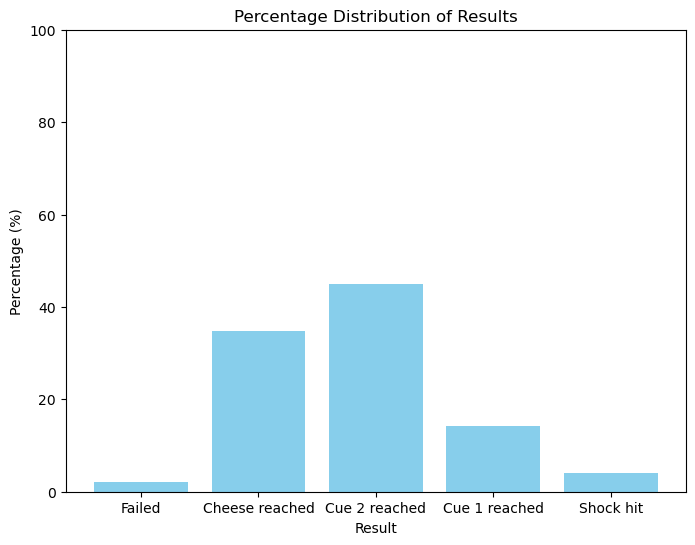

In [87]:
total_count, value_names, value_counts, percentages = cal_data(unseen_result)

plot_metrics(percentages.keys(), percentages.values(), 'Percentage Distribution of Results', 'Result', 'Percentage (%)')


**Calculate the metrics, including: Success Rate, Goal-conditioned Succress Rate, Oracle Success Rate**

In [88]:
cue_1_gc, cue_2_gc, cheese_gc, cheese_sr, sr_list, sr_list_name, fr, shock_sr, shock_gc, fr_list, fr_list_name = cal_metrics(value_counts, total_count)


**Plot SR, GC and Oracle SR**

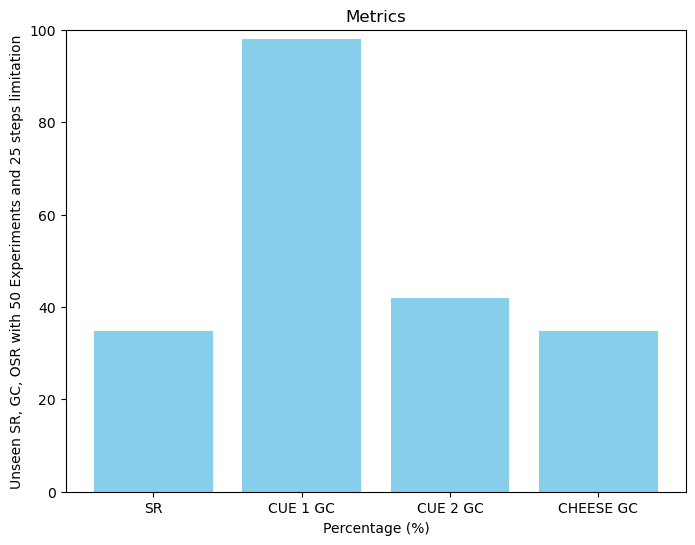

In [89]:
plot_metrics(sr_list_name, sr_list, 'Metrics', 'Percentage (%)', 'Unseen SR, GC, OSR with 50 Experiments and 25 steps limitation')

**Plot FR, SHOCK HIT RATE, SHOCK GC**

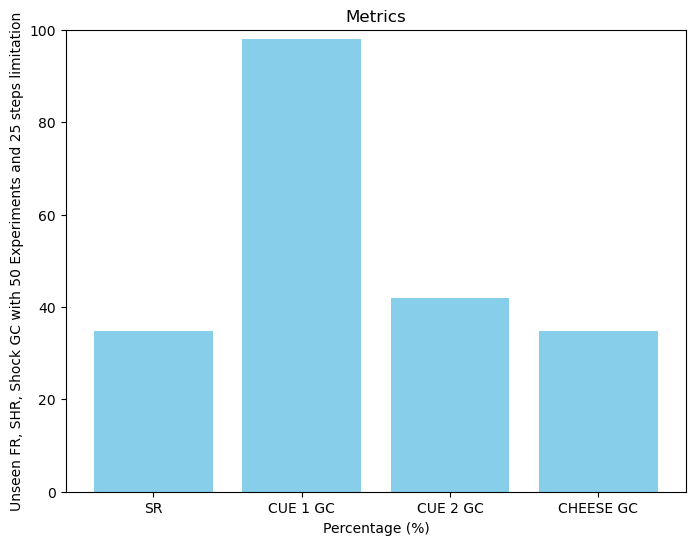

In [90]:
plot_metrics(sr_list_name, sr_list, 'Metrics', 'Percentage (%)', 'Unseen FR, SHR, Shock GC with 50 Experiments and 25 steps limitation')

**Plot the result for Half-Seen Env**

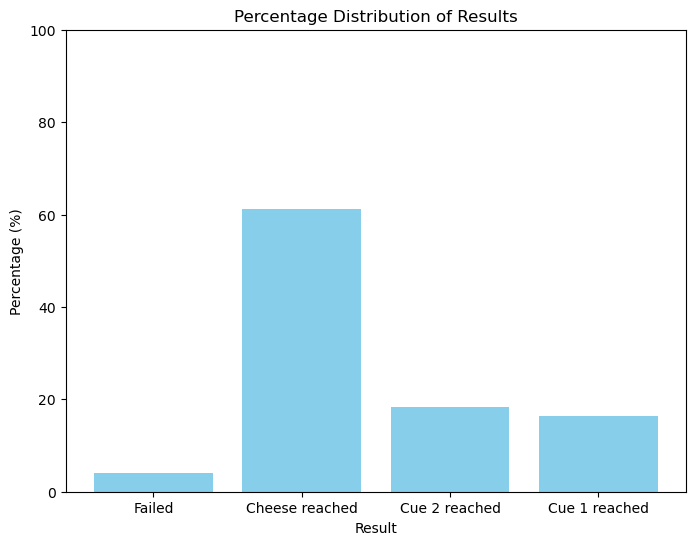

In [91]:
total_count, value_names, value_counts, percentages = cal_data(half_seen_result)

plot_metrics(percentages.keys(), percentages.values(), 'Percentage Distribution of Results', 'Result', 'Percentage (%)')

**Calculate the metrics, including: Success Rate, Goal-conditioned Succress Rate, Oracle Success Rate**

In [92]:
cue_1_gc, cue_2_gc, cheese_gc, cheese_sr, sr_list, sr_list_name, fr, shock_sr, shock_gc, fr_list, fr_list_name = cal_metrics(value_counts, total_count)


**Plot SR, GC and Oracle SR**

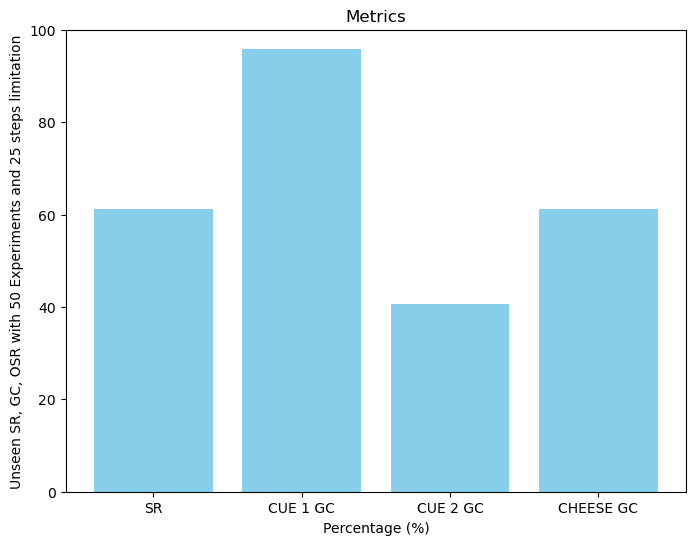

In [93]:
plot_metrics(sr_list_name, sr_list, 'Metrics', 'Percentage (%)', 'Unseen SR, GC, OSR with 50 Experiments and 25 steps limitation')

**Plot FR, SHOCK HIT RATE, SHOCK GC**

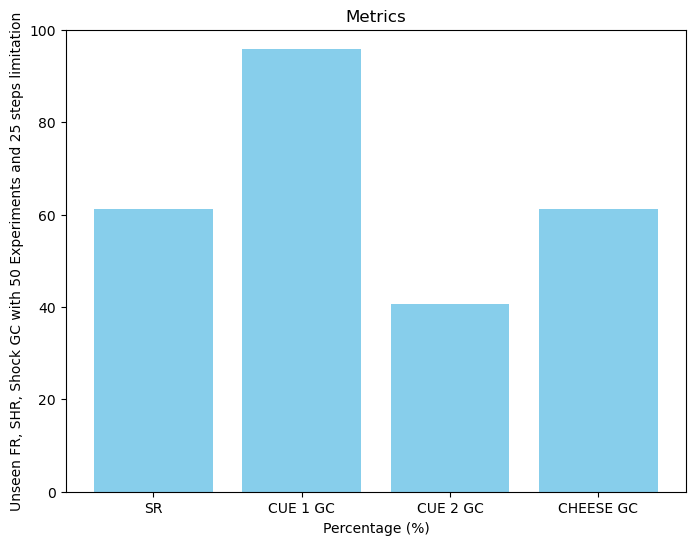

In [94]:
plot_metrics(sr_list_name, sr_list, 'Metrics', 'Percentage (%)', 'Unseen FR, SHR, Shock GC with 50 Experiments and 25 steps limitation')

**Plot the result for Seen Env**

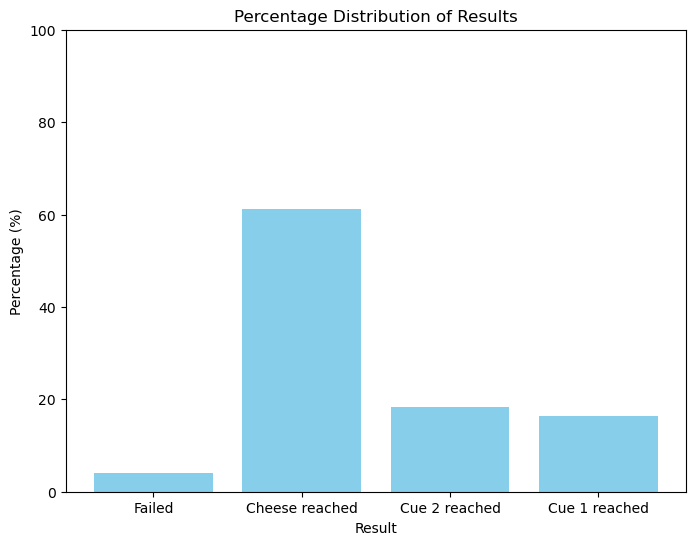

In [95]:
total_count, value_names, value_counts, percentages = cal_data(half_seen_result)

plot_metrics(percentages.keys(), percentages.values(), 'Percentage Distribution of Results', 'Result', 'Percentage (%)')

**Calculate the metrics, including: Success Rate, Goal-conditioned Succress Rate, Oracle Success Rate**

In [96]:
cue_1_gc, cue_2_gc, cheese_gc, cheese_sr, sr_list, sr_list_name, fr, shock_sr, shock_gc, fr_list, fr_list_name = cal_metrics(value_counts, total_count)


**Plot SR, GC and Oracle SR**

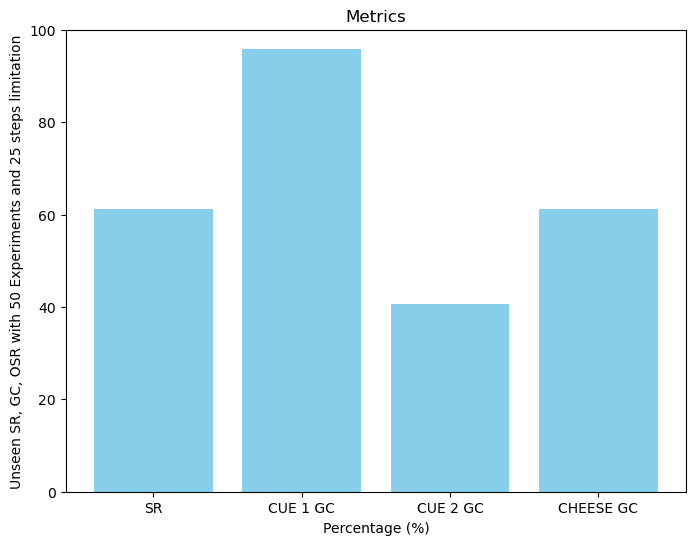

In [97]:
plot_metrics(sr_list_name, sr_list, 'Metrics', 'Percentage (%)', 'Unseen SR, GC, OSR with 50 Experiments and 25 steps limitation')

**Plot FR, SHOCK HIT RATE, SHOCK GC**

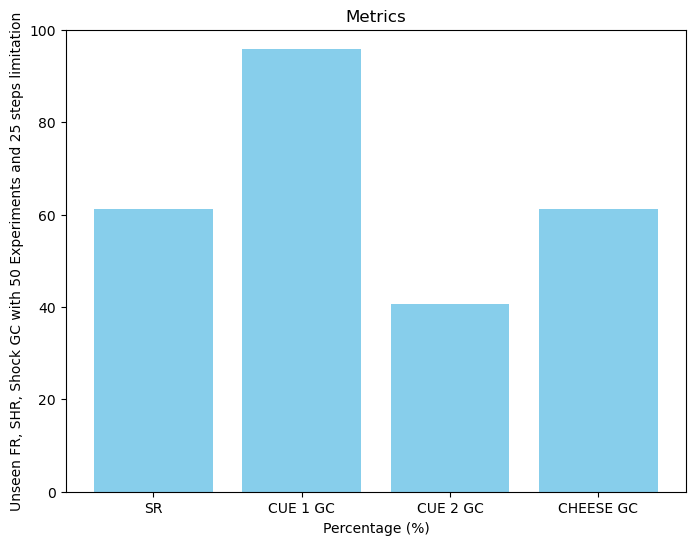

In [98]:
plot_metrics(sr_list_name, sr_list, 'Metrics', 'Percentage (%)', 'Unseen FR, SHR, Shock GC with 50 Experiments and 25 steps limitation')